In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load the data
file_path='/Users/niloughazavi/Desktop/Desktop-Nilou/Nilou/PhD_Courses/BIOENGR223A/Project/Motion_5k_frames.csv'

data = np.loadtxt(file_path, delimiter=',')

#  [x_shift, y_shift]
x_shift = data[:, 0]
y_shift = data[:, 1]

Text(0, 0.5, 'shift')

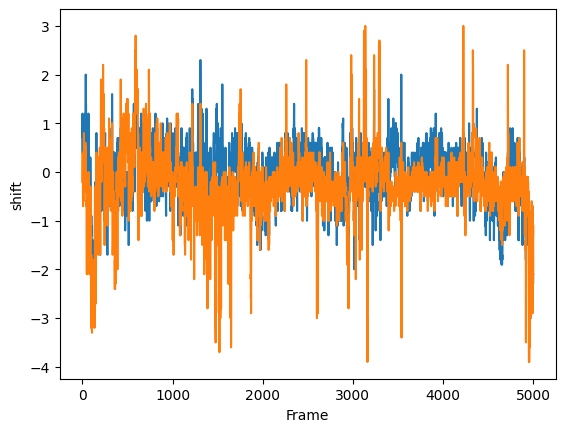

In [3]:
# periodic motion due to breathing , heartbeat, cyclical movement 
# each point : magnitude of shift of each frame
plt.plot(x_shift)
plt.plot(y_shift)
plt.xlabel('Frame')
plt.ylabel('shift')

In [4]:
# Plot histogram and Q-Q plot
def plot_distribution(data, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histogram
    ax1.hist(data, bins=50, density=True, alpha=0.7, color='skyblue')
    ax1.set_title(f'{title} - Histogram')
    ax1.set_xlabel('Shift (pixels)')
    ax1.set_ylabel('Density')
    
    
    mu, std = stats.norm.fit(data)
    xmin, xmax = ax1.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    ax1.plot(x, p, 'k', linewidth=2)
    ax1.text(0.05, 0.95, f'μ = {mu:.2f}\nσ = {std:.2f}', transform=ax1.transAxes, 
             verticalalignment='top')
    
    # Q-Q plot (Quantile-Quantile plot): compare the data to the theoretical normal distribution
    stats.probplot(data, dist="norm", plot=ax2)
    ax2.set_title(f'{title} - Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

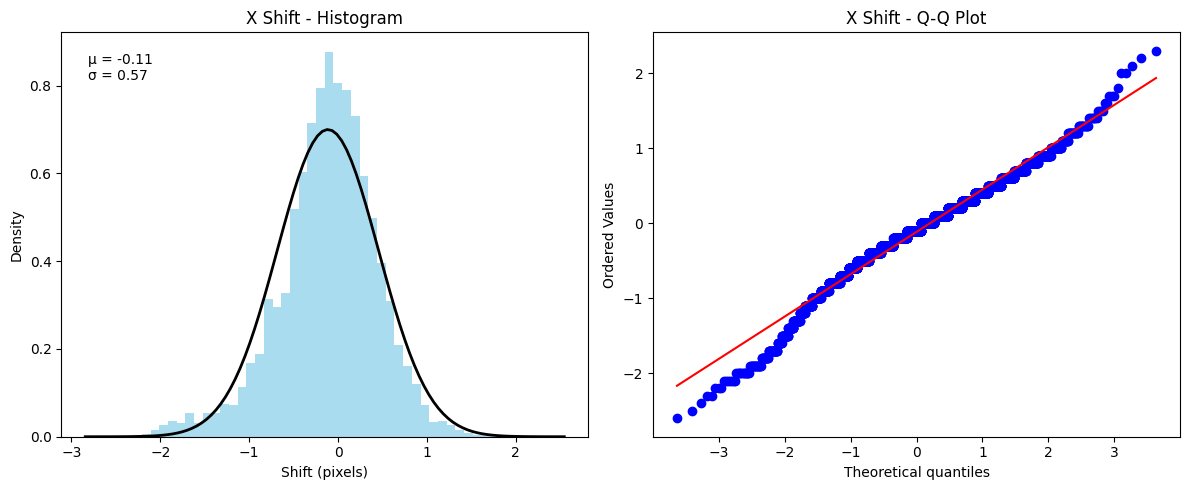

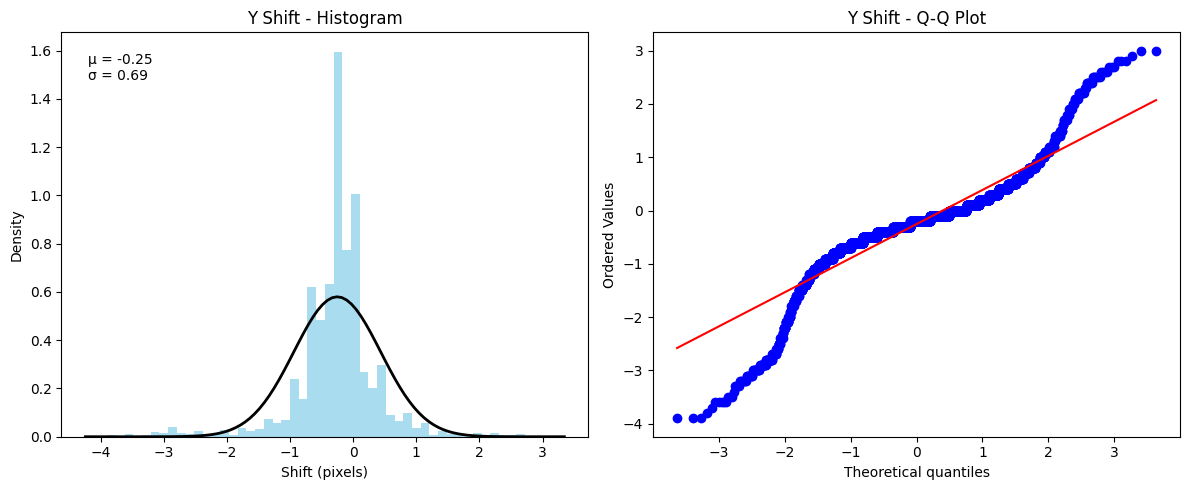

In [5]:
# Distribution of X and Y shifts
plot_distribution(x_shift, 'X Shift')
plot_distribution(y_shift, 'Y Shift')

In [6]:
# generate synthetic data 
def generate_synthetic_data(num_frames, noise_params):
    t = np.arange(num_frames)
    
    # Generate base motion 
    x_base = 2 * np.sin(2 * np.pi * 0.01 * t)
    y_base = 1.5 * np.cos(2 * np.pi * 0.015 * t)
    
    # Add non-Gaussian noise (laplace)
    x_noise = np.random.laplace(0, noise_params['scale'], num_frames)
    y_noise = np.random.laplace(0, noise_params['scale'], num_frames)
    
    x_motion_base = x_base 
    y_motion_base = y_base 
    x_motion_noise= x_base + x_noise
    y_motion_noise = y_base + y_noise
    
    return np.column_stack((x_motion_base, y_motion_base)), np.column_stack((x_motion_noise, y_motion_noise))



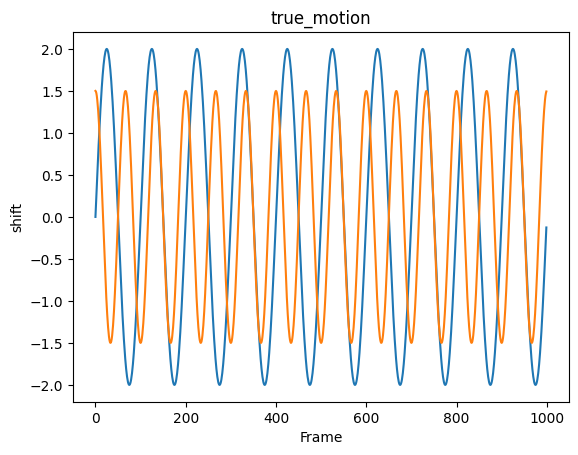

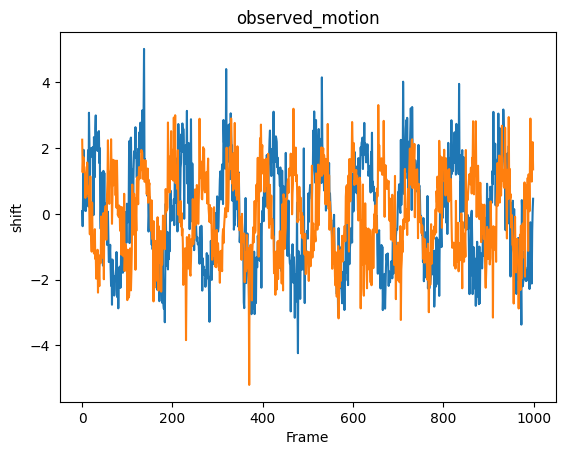

In [9]:

num_frames = 1000

# scale parameter shows the spread or dispersion of the distribution
noise_params = {'scale': 0.5}
synthetic_motion_base, synthetic_motion_noise = generate_synthetic_data(num_frames, noise_params)

x_shift_syn_b = synthetic_motion_base[:, 0]
y_shift_syn_b = synthetic_motion_base[:, 1]


plt.plot(x_shift_syn_b)
plt.plot(y_shift_syn_b)
plt.xlabel('Frame')
plt.ylabel('shift')
plt.title('true_motion')
plt.show()

x_shift_syn_n = synthetic_motion_noise[:, 0]
y_shift_syn_n = synthetic_motion_noise[:, 1]

plt.plot(x_shift_syn_n)
plt.plot(y_shift_syn_n)
plt.xlabel('Frame')
plt.ylabel('shift')
plt.title('observed_motion')
plt.show()



In [10]:

true_motion=synthetic_motion_base
observed_motion=synthetic_motion_noise